**Load modules**

In [74]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import patches
from PIL import Image

**Constraints**

In [75]:
# Directories
DATA_DIR    = '../../data'
IMAGES_DIR  = f'{DATA_DIR}/images'

# Images info CSV file
ALL_DATA_CSV_FILEPATH = f'{DATA_DIR}/all-data.csv'

**Load data**

In [76]:
# Load images info from csv file created by `data_load.ipynb`
data : pd.DataFrame = pd.read_csv(ALL_DATA_CSV_FILEPATH)
data

,max_r,max_c,min_r,min_c,category,label,img_path
0,1158,1540,1057,1440,red blood cell,0,../../data/images/8d02117d-6c71-4e47-b50a-6cc8...
1,971,1403,868,1303,red blood cell,0,../../data/images/8d02117d-6c71-4e47-b50a-6cc8...
2,689,1008,578,900,red blood cell,0,../../data/images/8d02117d-6c71-4e47-b50a-6cc8...
3,408,713,304,611,red blood cell,0,../../data/images/8d02117d-6c71-4e47-b50a-6cc8...
4,312,1003,198,881,red blood cell,0,../../data/images/8d02117d-6c71-4e47-b50a-6cc8...
...,...,...,...,...,...,...,...
86030,1145,787,1047,694,red blood cell,0,../../data/images/887cc81a-bae3-4360-a115-23ae...
86031,617,1464,543,1381,red blood cell,0,../../data/images/887cc81a-bae3-4360-a115-23ae...
86032,1196,1880,1041,1725,ring,4,../../data/images/887cc81a-bae3-4360-a115-23ae...
86033,653,508,526,374,ring,4,../../data/images/887cc81a-bae3-4360-a115-23ae...


**Random Images presentation**

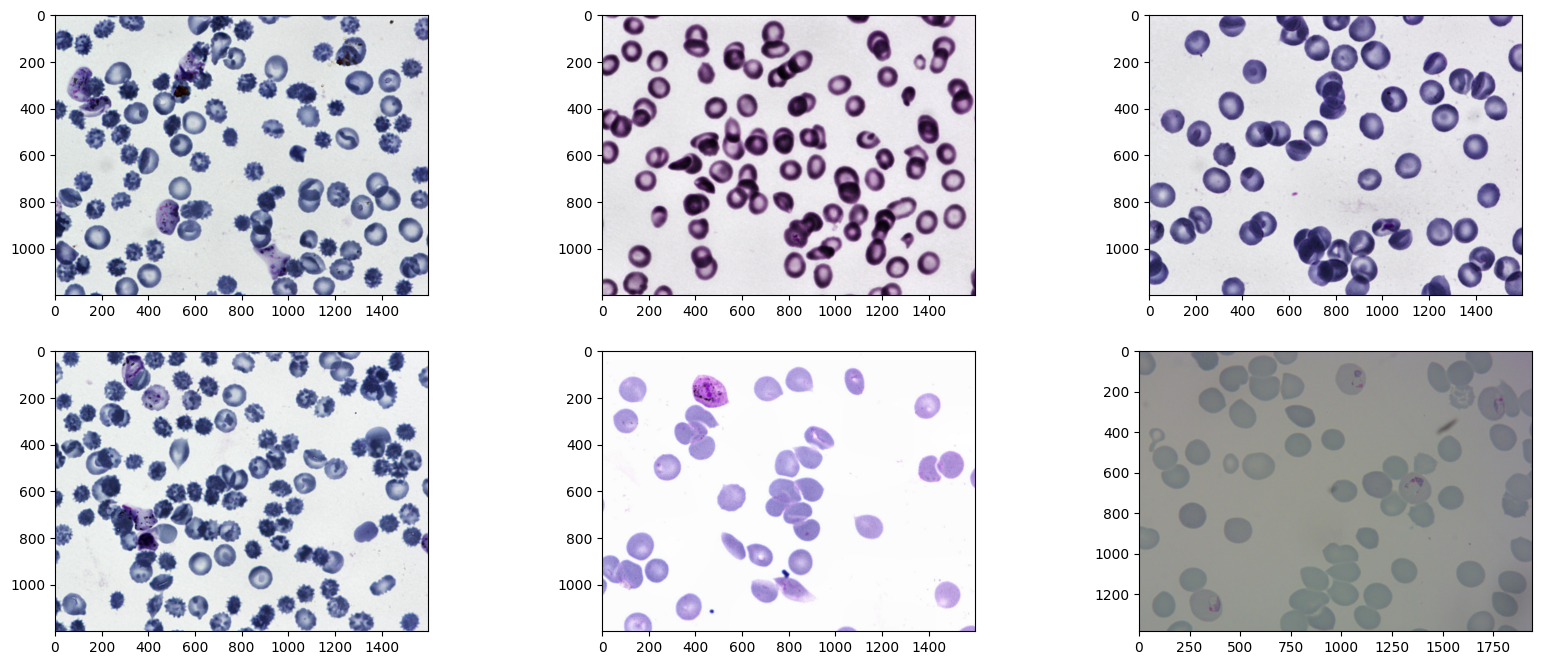

In [77]:
plt.figure(figsize = (20,8))
count=1
for row in list(np.random.choice(data.shape[0],6)): # taking 6 random index inputs and displaying the image
    path = data.iloc[row]['img_path']
    img = Image.open(path)
    
    plt.subplot(2,3,count)
    plt.imshow(img)
    plt.grid(False)
    count+=1

**Class distribution**

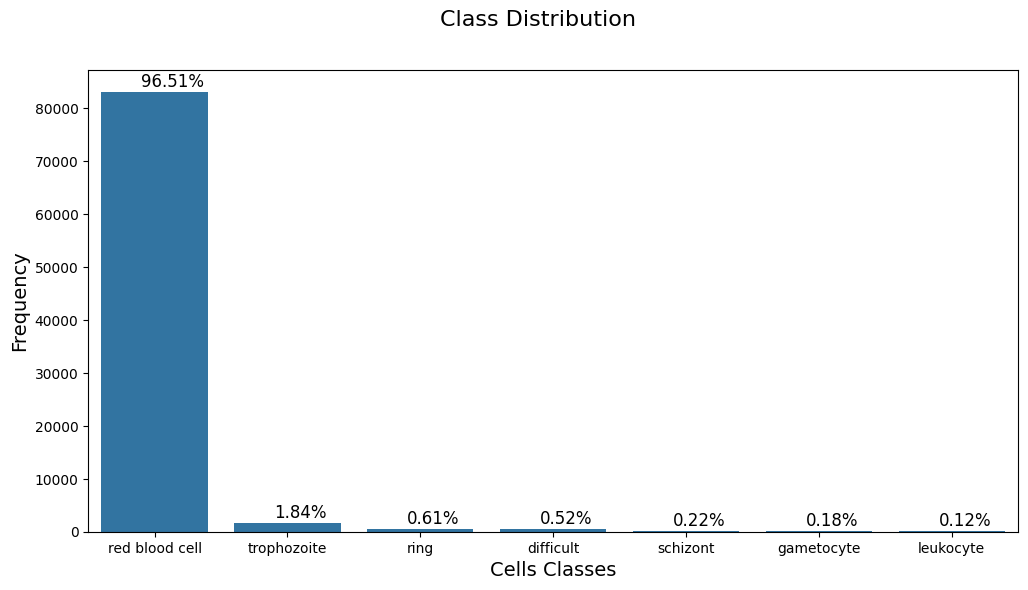

In [78]:
fig, ax = plt.subplots(figsize=(12,6))
temp = data['category'].value_counts().values
sns.barplot(x = data['category'].value_counts().index.tolist(),y = data['category'].value_counts().values.tolist())

for i,text in enumerate(data['category'].value_counts(normalize = True).items()):
    ax.annotate("{:.2f}%".format(text[1]*100),xy = (i-0.10,temp[i]+1000),fontsize = 12)
    
plt.xlabel("Cells Classes",fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.suptitle("Class Distribution",fontsize = 16)
plt.show()

**Random image objects description**

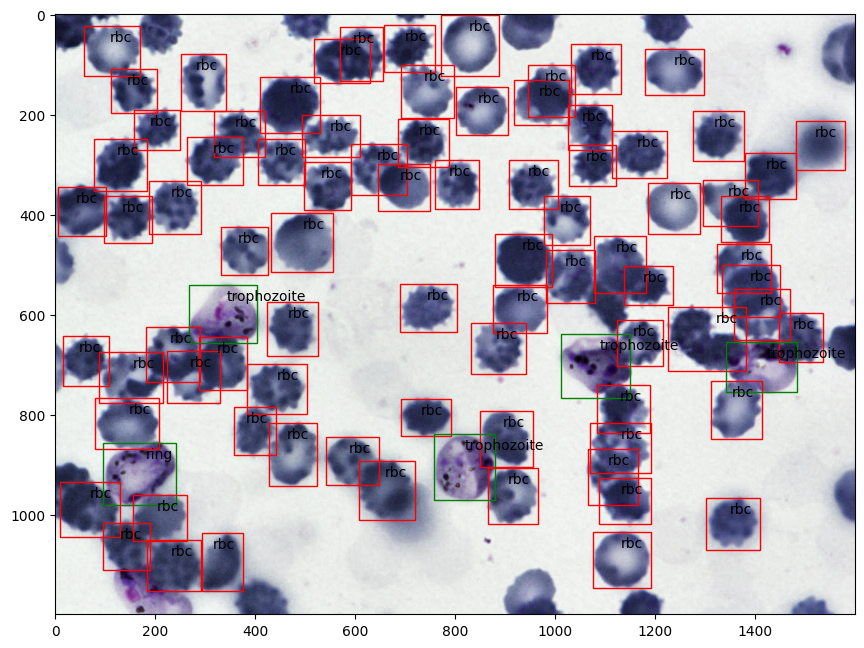

In [102]:
# figure init
fig = plt.figure(figsize = (12,6))

# random image show
ax = fig.add_axes([0,0,1,1])
row = np.random.choice(data.shape[0],1)[0]
path = data.iloc[row]['img_path']
image = plt.imread(path)
plt.imshow(image)

class_colors_dict = {
    'red blood cell'    : 'r',
    'trophozoite'       : 'g', 
    'schizont'          : 'g', 
    'difficult'         : 'b', 
    'ring'              : 'g',
    'leukocyte'         : 'r', 
    'gametocyte'        : 'g'
}

# objects description
for _, object in data[data.img_path==path].iterrows():
    # object position
    x1 : int = object.min_c
    x2 : int = object.max_c
    y1 : int = object.min_r
    y2 : int = object.max_r
    
    # object rectangle width and height
    w : int = x2 - x1
    h : int = y2 - y1
    
    # category annotation
    category = object.category
    color = class_colors_dict[category]
    
    if category == 'red blood cell':
        category = 'rbc'
        
    ax.annotate(category, xy=(x2-60, y1+30))
        
    # object renctangle draw
    rect = patches.Rectangle((x1, y1), w, h, edgecolor=color, facecolor='none')
    ax.add_patch(rect)